In [125]:
import os 
import glob
import tensorflow as tf 
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import re

# Read Data

In [131]:
img_dir = "Documents\kuliahsss\samp" # Enter Directory of all images 
img_Label = pd.read_csv("trainLabels.csv")
img_Label = list(img_Label.loc[:149]['Labels'])
data_path = os.path.join(img_dir,'*.JPG')
files = glob.glob(data_path)
data = []

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

for f1 in sorted(files, key=numericalSort):
    img = cv.imread(f1)
    data.append(img)

In [90]:
img_dir = "Documents\kuliahsss\mechine\captcha4word" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*.PNG')
files = glob.glob(data_path)

for f1 in sorted(files, key=numericalSort):
    img = cv.imread(f1)
    data.append(img)

In [91]:
label2 = []
for file in files :
    label2.append(file.split("\\")[4].split(".")[0])

In [92]:
img_label = list(img_Label.loc[:149]['Labels'])
for label in label2 :
    img_label.append(label)

In [93]:
img_Label = img_label

In [132]:
len(data), len(img_Label)

(150, 150)

In [133]:
Listimg = np.array(data)

In [134]:
def showImage(row,col,Listimg):
    fig=plt.figure(figsize=(10, 10))
    columns = col
    rows = row
    for i in range(columns*rows):
        img = Listimg[i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
    plt.show()

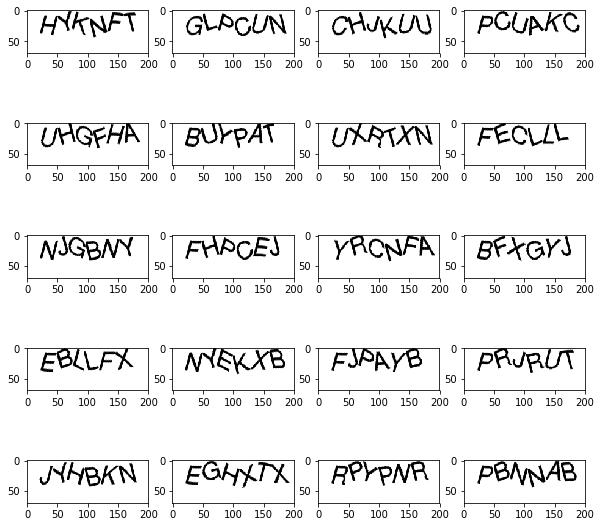

In [135]:
showImage(5,4,Listimg)

In [136]:
gray = grayScale(Listimg)

In [163]:
g = gray[104].copy()
b = BW(gray[104])
contours = find_contours(b)

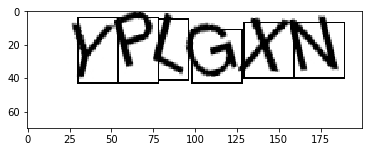

In [165]:
for c in contours:
    x,y,w,h = cv.boundingRect(c)   
    if w/h > 1 :
        half = int(w//2)
        if half / h > 1: 
            halff = int(half//2)
            splitImg.append([x,y,halff,h])
            splitImg.append([x+halff,y,halff,h])
            splitImg.append([x+half,y,halff,h])
            splitImg.append([x+half+halff,y,halff,h])
            rect1 = np.array([[x+halff-1,y-1],
                         [x+halff-1,y+h-1],
                         [x+half-1,y+h-1],
                         [x+half-1,y-1]])
            rect2 = np.array([[x-1,y-1],
                         [x-1,y+h-1],
                         [x+halff-1,y+h-1],
                         [x+halff-1,y-1]])
            rect3 = np.array([[x+half+halff-1,y-1],
                         [x+half+halff-1,y+h-1],
                         [x+half+2*halff-1,y+h-1],
                         [x+half+2*halff-1,y-1]])
            rect4 = np.array([[x+half-1,y-1],
                         [x+half-1,y+h-1],
                         [x+half+halff-1,y+h-1],
                         [x+half+halff-1,y-1]])
            im = cv.drawContours(g,[rect1],0,1,0)
            im = cv.drawContours(g,[rect2],0,1,0)
            im = cv.drawContours(g,[rect3],0,1,0)
            im = cv.drawContours(g,[rect4],0,1,0)    
        else :     
            splitImg.append([x,y,half,h])
            splitImg.append([x+half,y,half,h])
            rect1 = np.array([[x+half-1,y-1],
                         [x+half-1,y+h-1],
                         [x+w-1,y+h-1],
                         [x+w-1,y-1]])
            rect2 = np.array([[x-1,y-1],
                         [x-1,y+h-1],
                         [x+half-1,y+h-1],
                         [x+half-1,y-1]])
            im = cv.drawContours(g,[rect1],0,1,0)
            im = cv.drawContours(g,[rect2],0,1,0)
    else :
        splitImg.append([x,y,w,h])
        rect1 = np.array([[x-1,y-1],
                     [x-1,y+h-1],
                     [x+w-1,y+h-1],
                     [x+w-1,y-1]])
        im = cv.drawContours(g,[rect1],0,1,0)
plt.imshow(g,cmap='gray')

# Data Preprocessing 

In [166]:
def grayScale(Listimg):
    grays = []
    for i in range(Listimg.shape[0]):
        grays.append(cv.cvtColor(Listimg[i], cv.COLOR_BGR2GRAY))   
    return np.array(grays)

In [167]:
def BW(grayScaleImg):
    grayScaleImg = cv.copyMakeBorder(grayScaleImg, 4, 4, 4, 4, cv.BORDER_REPLICATE)
    #thresholding
    BW = cv.threshold(grayScaleImg, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
    return BW

In [168]:
def find_contours(BW):
    #find contours
    _, contours, _= cv.findContours(BW.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE) 
    return contours

In [169]:
def splitImage(contours):
    splitImg = []
    for c in contours:
        x,y,w,h = cv.boundingRect(c)
    # if ratio to high spplit into 2 image
        if w/h > 1 :   
            half = int(w//2)       
            if half / h > 1: 
                halff = int(half//2)
                splitImg.append([x,y,halff,h])
                splitImg.append([x+halff,y,halff,h])
                splitImg.append([x+half,y,halff,h])
                splitImg.append([x+half+halff,y,halff,h])
            else :
                splitImg.append([x,y,half,h])
                splitImg.append([x+half,y,half,h])
        else :
            splitImg.append([x,y,w,h])
    return splitImg

In [174]:
def savePath(path,file):
    return os.path.join(path,file)

# def makeFolder(path):
#     if not os.path.exists(path):
#         os.makedirs(path)

def LetterImage(grayImg,splitImg,img_Label,counts):
    splitImg = sorted(splitImg, key=lambda x: x[0])
    for boundary,label in zip(splitImg, img_Label) :
        print(label)
        x,y,w,h = boundary
        letter = grayImg[y-2:y+h+2, x-2:x+w+2]
        plt.imshow(letter,cmap='gray')
        
        save_path = savePath("Documents\\kuliahsss\\TrainCapt3",label)
        
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        
        count = counts.get(label, 1)
        path = os.path.join(save_path, "{}.jpg".format(str(count).zfill(6)))
        cv.imwrite(path, letter)  
        
        counts[label] = count + 1
        

In [175]:
def createNewSplit(Listimg,img_Label):
    counts = {}
    #convert to gray
    gray = grayScale(Listimg)
    # for all image 
    for i in range(gray.shape[0]):
        bw = BW(gray[i])
        contours = find_contours(bw)
        splitImg = splitImage(contours)
        LetterImage(gray[i],splitImg,img_Label[i],counts)

In [176]:
gray = grayScale(Listimg)

H
Y
K
N
F
T
G
L
P
C
U
N
C
H
J
K
U
U
P
C
U
A
K
C
U
H
G
F
H
A
B
U
Y
P
A
T
U
X
R
T
X
N
F
E
C
L
L
L
N
J
G
B
N
Y
F
H
P
C
E
J
Y
R
C
N
F
A
B
F
X
G
Y
J
E
B
L
L
F
X
N
Y
E
K
X
B
F
J
P
A
Y
B
P
R
J
R
U
T
J
Y
H
B
K
N
E
G
H
X
T
X
R
P
Y
P
N
R
P
B
N
N
A
B
U
J
C
P
M
Y
M
M
A
L
F
Y
N
Y
G
B
M
H
T
E
E
J
K
B
K
K
P
F
J
J
R
B
P
H
L
Y
J
L
R
L
E
B
R
M
K
T
J
F
X
F
C
M
E
J
Y
N
G
A
J
G
G
J
K
B
H
B
B
B
U
U
B
F
C
U
M
G
T
N
X
A
F
E
T
K
C
P
E
C
K
P
H
T
P
N
E
P
Y
B
G
M
M
C
C
X
B
K
L
A
G
H
H
L
K
H
R
K
X
J
G
U
R
F
T
R
T
A
N
X
Y
P
R
G
U
K
U
T
R
G
E
L
C
C
P
F
P
X
N
P
J
R
A
R
P
T
H
H
R
X
B
P
P
C
P
H
U
T
H
L
F
H
G
K
T
G
Y
F
J
K
F
P
J
M
M
R
F
U
X
E
K
K
G
X
G
L
A
X
X
N
U
L
P
P
C
T
L
X
Y
B
F
T
E
N
N
B
K
A
J
E
J
A
F
P
K
G
T
R
B
B
G
E
G
N
X
T
T
U
Y
J
R
T
P
R
T
M
L
J
C
J
N
M
H
X
N
H
M
E
H
T
J
J
X
K
H
L
A
R
U
B
L
P
L
B
U
B
U
Y
J
H
B
M
E
T
E
G
E
G
U
R
C
H
N
G
J
N
R
Y
R
T
X
M
G
J
F
J
J
N
B
A
E
K
N
C
F
R
T
K
J
B
C
A
M
B
M
P
P
E
C
R
C
U
T
B
H
N
C
N
H
F
Y
P
G
X
C
A
J
G
E
J
M
Y
B
X
X
E
R
A
P
Y
E
L
U
R
M
T
A
R
U
L
C
C
X
C
B
X
P
X
A
B
N
B


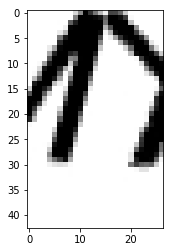

In [177]:
createNewSplit(Listimg,img_Label)

In [178]:
img_dir = "Documents\kuliahsss\TrainCapt3"
subdirs = [x[0] for x in os.walk(img_dir)]  
class_num = -1
y = []
trainData = []
for subdir in subdirs :
    data_path = os.path.join(subdir,"*.JPG")
    files = glob.glob(data_path)
    class_num += 1   
    for img in files :
        try :
            img_array = cv.imread(img,cv.IMREAD_GRAYSCALE)
            new_array = cv.resize(img_array,(50,50))
            trainData.append(new_array)
            y.append(class_num)
        except Exception as e:
            pass
     

In [182]:
trainData = np.array(trainData)

In [185]:
trainData.shape

(865, 50, 50)

In [186]:
trainData  = trainData.reshape(trainData.shape[0],1,50,50)

In [188]:
classNum = len(set(y))

In [189]:
label = np.copy(y)

In [190]:
label.shape

(865,)

# One hot encoding the Data

In [191]:
label = np.int64(label)
nvalues = np.max(label) 
label = np.eye(nvalues)[label-1]

In [192]:
label = np.float64(label)
label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Create Models

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [199]:
def cnn_model(X,y):
    classNum = yTrain.shape[1]

    model = Sequential()

    conv2d = Conv2D(64,(2,2),strides=(1,1),input_shape = X.shape[1:],padding='valid')
    
    model.add(conv2d)
    model.add(MaxPooling2D(pool_size=(2,2)))

    conv2d = Conv2D(64,(2,2),strides=(1,1),padding = 'valid',activation='relu')
    model.add(conv2d)
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(conv2d)
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    
    model.add(Dense(classNum))
    model.add(Activation('sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'SGD',
                  metrics=['accuracy'])
    
    model.fit(X,y,epochs = 20,batch_size = 16,validation_split=0.2)
    return model 

In [213]:
classNum = yTrain.shape[1]

model = Sequential()

conv2d = Conv2D(64,(2,2),strides=(1,1),input_shape = xTrain.shape[1:],padding='valid')

model.add(conv2d)
model.add(MaxPooling2D(pool_size=(2,2)))

conv2d = Conv2D(64,(2,2),strides=(1,1),padding = 'valid',activation='relu')
model.add(conv2d)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(conv2d)
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))

model.add(Dense(classNum))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'SGD',
              metrics=['accuracy'])

# Train Model

In [285]:
trainData.shape

(865, 1, 50, 50)

In [286]:
s = list(zip(trainData, label))
np.random.shuffle(s)
xTrain, yTrain = zip(*s)
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xTrain = xTrain.reshape(xTrain.shape[0],50,50,1)

In [287]:
xTrain.shape, yTrain.shape

((865, 50, 50, 1), (865, 18))

In [220]:
model = cnn_model(xTrain,yTrain)

Train on 692 samples, validate on 173 samples
Epoch 1/20
692/692 [==============================] - 11s 16ms/sample - loss: 0.3791 - acc: 0.9212 - val_loss: 0.2079 - val_acc: 0.9444
Epoch 2/20
692/692 [==============================] - 0s 649us/sample - loss: 0.2034 - acc: 0.9447 - val_loss: 0.1967 - val_acc: 0.9444
Epoch 3/20
692/692 [==============================] - 0s 657us/sample - loss: 0.1914 - acc: 0.9449 - val_loss: 0.1901 - val_acc: 0.9454
Epoch 4/20
692/692 [==============================] - 0s 625us/sample - loss: 0.1806 - acc: 0.9461 - val_loss: 0.2056 - val_acc: 0.9329
Epoch 5/20
692/692 [==============================] - 0s 650us/sample - loss: 0.1664 - acc: 0.9481 - val_loss: 0.1590 - val_acc: 0.9489
Epoch 6/20
692/692 [==============================] - 0s 617us/sample - loss: 0.1509 - acc: 0.9505 - val_loss: 0.1722 - val_acc: 0.9505
Epoch 7/20
692/692 [==============================] - 0s 617us/sample - loss: 0.1423 - acc: 0.9520 - val_loss: 0.1553 - val_acc: 0.9467
Ep

In [221]:
model.save_weights("modelweights1.h5")

In [214]:
model2 = model.fit(xTrain,yTrain,epochs = 30,batch_size = 16,validation_split=0.2)

Train on 692 samples, validate on 173 samples
Epoch 1/30
692/692 [==============================] - 12s 17ms/sample - loss: 0.4298 - acc: 0.9155 - val_loss: 0.2213 - val_acc: 0.9444
Epoch 2/30
692/692 [==============================] - 0s 621us/sample - loss: 0.1952 - acc: 0.9444 - val_loss: 0.1917 - val_acc: 0.9444
Epoch 3/30
692/692 [==============================] - 0s 618us/sample - loss: 0.1797 - acc: 0.9444 - val_loss: 0.1812 - val_acc: 0.9444
Epoch 4/30
692/692 [==============================] - 0s 660us/sample - loss: 0.1614 - acc: 0.9455 - val_loss: 0.2830 - val_acc: 0.8995
Epoch 5/30
692/692 [==============================] - 0s 614us/sample - loss: 0.1510 - acc: 0.9461 - val_loss: 0.1504 - val_acc: 0.9470
Epoch 6/30
692/692 [==============================] - 0s 611us/sample - loss: 0.1332 - acc: 0.9540 - val_loss: 0.1965 - val_acc: 0.9290
Epoch 7/30
692/692 [==============================] - 0s 617us/sample - loss: 0.1183 - acc: 0.9593 - val_loss: 0.1316 - val_acc: 0.9550
Ep

In [ ]:
model.save_weights("modelweight1.h5")

# Open Test Data

In [222]:
# Test directory with label
img_dir = "Documents\\kuliahsss\\samptest" 
data_path = os.path.join(img_dir,'*.JPG')
files = glob.glob(data_path)
data = []

for f1 in sorted(files, key=numericalSort):
    img = cv.imread(f1)
    data.append(img)

In [199]:
# Test directory without label
img_dir = "Documents\\kuliahsss\\test" 
data_path = os.path.join(img_dir,'*.JPG')
files = glob.glob(data_path)
data = []

for f1 in sorted(files, key=numericalSort):
    img = cv.imread(f1)
    data.append(img)

# Preprocess Test Data

In [236]:
classPath = "Documents\\kuliahsss\\TrainCapt3"
classList = os.listdir(classPath)

In [238]:
Listimg = np.array(data)
grayimg = grayScale(Listimg)

# Load Model

In [239]:
def model():
    classNum = yTrain.shape[1]

    model = Sequential()

    conv2d = Conv2D(64,(2,2),strides=(1,1),input_shape = (50,50,1),padding='valid')
    
    model.add(conv2d)
    model.add(MaxPooling2D(pool_size=(2,2)))

    conv2d = Conv2D(64,(2,2),strides=(1,1),padding = 'valid',activation='relu')
    model.add(conv2d)
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(conv2d)
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    
    model.add(Dense(classNum))
    model.add(Activation('sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'SGD',
                  metrics=['accuracy'])
    return model

In [240]:
modelTest = model()

In [243]:
modelTest.load_weights("modelweights1.h5")

# Predict Test Data

In [332]:
gray = grayimg
ls = []

for i in range(grayimg.shape[0]):
    bw = BW(gray[i])
    contours = find_contours(bw)
    splitImg = splitImage(contours)
    splitImg = sorted(splitImg, key=lambda x: x[0])
    predict = ""
    word = []
    count = 0 
    for boundary in splitImg:
        try :
            x,y,w,h = boundary
            y1 = y-2
            y2 = y+h+2
            x1 = x-2
            x2 = x+w+2
            if y1 < 0 :
                y1 = 0 
            if x1 < 0 :
                x1 = 0
            if y2 > gray.shape[1] :
                y2 = gray.shape[1]
            if x2 > gray.shape[2] :
                x2 = gray.shape[2]   
            letter = gray[i][y1:y2, x1:x2]
            letter = cv.resize(letter,(50,50))
            letter = letter.reshape(50,50,1)
            word.append(letter)  
        except:
            continue
    word = np.array(word)
    pred = modelTest.predict_classes(word)
    for c in pred : 
        predict += classList[c]
    ls.append(predict)

In [333]:
labelTest = pd.read_csv("trainLabels.csv")
labelTest = list(labelTest.loc[150:]['Labels'])

In [334]:
print(labelTest)

['HXFKPT', 'TTUKFG', 'TJLBRN', 'JHJBTY', 'RUALXF', 'YKENRX', 'HEEEPM', 'JCKTAG', 'MHKTHJ', 'MMFCJK', 'BXYKEC', 'EXKKCK', 'BGFJNL', 'UKMRNG', 'FJJRYU', 'AFCUFA', 'BEEAHL', 'CUETFC', 'TERKTK', 'BJMLKE', 'MKPMLE', 'GGLNGR', 'JNKRBL', 'LXJPEN', 'AYUTCU', 'BLHRAF', 'BCTNPF', 'LTUCXA', 'ANENGM', 'TXFXFL', 'LJAHLP', 'CYCPMX', 'PBAENB', 'UPNKMY', 'MFHJRH', 'CLPPAY', 'BTRFRX', 'KYRHCU', 'GJERXL', 'BPLLMU', 'AHAFGT', 'CPCTPE', 'RUAMML', 'PPGAME', 'ABXTXM', 'MPFGKB', 'CAKCJE', 'RTEFKL', 'FMLLJN', 'NKMKTN']


In [335]:
trueprd = 0
for i in range(len(labelTest)) :
    if labelTest[i] == ls[i]:
        trueprd +=1

In [342]:
wordList =  "".join(labelTest)

In [345]:
wordListPred = "".join(ls)

In [346]:
trueprdword = 0
for i in range(len(wordList)) :
    if wordList[i] == wordListPred[i] :
        trueprdword +=1

In [347]:
print("Word Accuracy : " + str(trueprdword / len(labelTest)))

Word Accuracy : 1.0


In [348]:
print("Accuracy : "+ str(trueprd / len(labelTest)))

Accuracy : 0.66


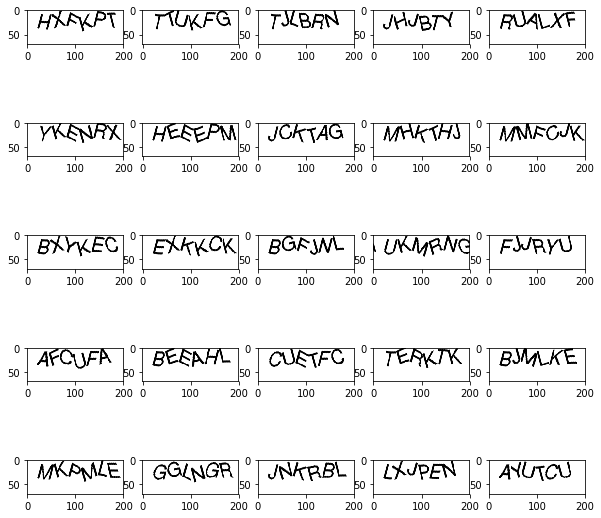

['HXFKPT', 'TUXFG', 'TJLBRN', 'JHJBTY', 'RUALXF', 'YREHRX', 'HEELPLT', 'JCKTAG', 'MFRRRJ', 'MMFCJK', 'BXYKEC', 'EXKKCK', 'BGPJNL', 'LURMFNLFFF', 'FJJRYU', 'AFCUFA', 'BEEAHXL', 'CUETFC', 'HHKTK', 'BJMLKE', 'BARFMLE', 'GGLNGR', 'JNKRBL', 'LXJPEN', 'AYUTCU', 'BLFTKRF', 'BCRFF', 'LTUCXA', 'ANNGM', 'TXFXFL', 'LXRHLP', 'CYCPMX', 'PBAEHRR', 'UFNKMH', 'MFHJRH', 'CLPPAY', 'BTRFRX', 'KYRHCU', 'GJEHXL', 'BPLLMU', 'AHAFGT', 'CPCTPE', 'RUAMML', 'PPGAME', 'ABXTXM', 'MFFGKR', 'CAKCJE', 'RTEFKL', 'FMLLJN', 'NKMKTN']


In [350]:
showImage(5,5,Listimg[:25])
print(ls)

46


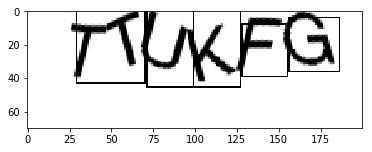

In [310]:
g = gray[1].copy()
b = BW(gray[1])
contours = find_contours(b)
for c in contours:
    x,y,w,h = cv.boundingRect(c)   
    if w/h > 1 :
        half = int(w//2)
        if half / h > 1: 
            halff = int(half//2)
            splitImg.append([x,y,halff,h])
            splitImg.append([x+halff,y,halff,h])
            splitImg.append([x+half,y,halff,h])
            splitImg.append([x+half+halff,y,halff,h])
            rect1 = np.array([[x+halff-1,y-1],
                         [x+halff-1,y+h-1],
                         [x+half-1,y+h-1],
                         [x+half-1,y-1]])
            rect2 = np.array([[x-1,y-1],
                         [x-1,y+h-1],
                         [x+halff-1,y+h-1],
                         [x+halff-1,y-1]])
            rect3 = np.array([[x+half+halff-1,y-1],
                         [x+half+halff-1,y+h-1],
                         [x+half+2*halff-1,y+h-1],
                         [x+half+2*halff-1,y-1]])
            rect4 = np.array([[x+half-1,y-1],
                         [x+half-1,y+h-1],
                         [x+half+halff-1,y+h-1],
                         [x+half+halff-1,y-1]])
            im = cv.drawContours(g,[rect1],0,1,0)
            im = cv.drawContours(g,[rect2],0,1,0)
            im = cv.drawContours(g,[rect3],0,1,0)
            im = cv.drawContours(g,[rect4],0,1,0)    
        else :     
            splitImg.append([x,y,half,h])
            splitImg.append([x+half,y,half,h])
            rect1 = np.array([[x+half-1,y-1],
                         [x+half-1,y+h-1],
                         [x+w-1,y+h-1],
                         [x+w-1,y-1]])
            rect2 = np.array([[x-1,y-1],
                         [x-1,y+h-1],
                         [x+half-1,y+h-1],
                         [x+half-1,y-1]])
            im = cv.drawContours(g,[rect1],0,1,0)
            im = cv.drawContours(g,[rect2],0,1,0)
            print(h)
    else :
        splitImg.append([x,y,w,h])
        rect1 = np.array([[x-1,y-1],
                     [x-1,y+h-1],
                     [x+w-1,y+h-1],
                     [x+w-1,y-1]])
        im = cv.drawContours(g,[rect1],0,1,0)
plt.imshow(g,cmap='gray')